## Visual story telling part 2: Capital Metro data

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [2]:
df_capmetro = pd.read_csv("capmetro_UT.csv") #Read the dataset

In [3]:
df_capmetro.shape # shape of the dataset

(5824, 8)

In [4]:
df_capmetro.columns #Checking column names

Index(['timestamp', 'boarding', 'alighting', 'day_of_week', 'temperature',
       'hour_of_day', 'month', 'weekend'],
      dtype='object')

In [5]:
df_capmetro.head() #Checking first few rows

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [6]:
df_capmetro.info() #Understanding dtype and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5824 non-null   object 
 1   boarding     5824 non-null   int64  
 2   alighting    5824 non-null   int64  
 3   day_of_week  5824 non-null   object 
 4   temperature  5824 non-null   float64
 5   hour_of_day  5824 non-null   int64  
 6   month        5824 non-null   object 
 7   weekend      5824 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 364.1+ KB


In [9]:
# Timestamp variable transformations
df_capmetro['timestamp'] = pd.to_datetime(df_capmetro['timestamp'])
df_capmetro['month'] = df_capmetro['timestamp'].dt.month #Extracting month
df_capmetro['day'] = df_capmetro['timestamp'].dt.day #Extracting day
df_capmetro['time'] = df_capmetro['timestamp'].dt.time #Extracting time
df_capmetro['date'] = df_capmetro['timestamp'].dt.date#Extracting date

In [10]:
df_capmetro.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,day,time,date
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,9,weekend,1,06:00:00,2018-09-01
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,9,weekend,1,06:15:00,2018-09-01
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,9,weekend,1,06:30:00,2018-09-01
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,9,weekend,1,06:45:00,2018-09-01
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,9,weekend,1,07:00:00,2018-09-01


## Univariate Analysis
Understanding each column

In [11]:
df_capmetro['boarding'].describe()

count    5824.000000
mean       51.511676
std        48.820284
min         0.000000
25%        13.000000
50%        33.000000
75%        79.250000
max       288.000000
Name: boarding, dtype: float64

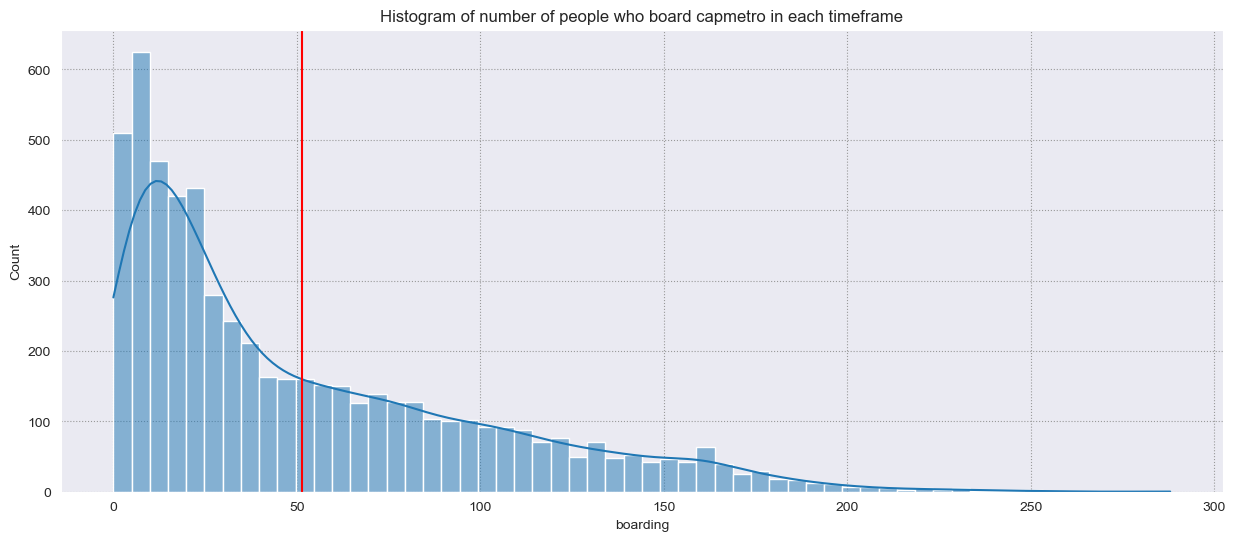

In [12]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_capmetro, x="boarding", binwidth=5, kde=True)
plt.axvline(x=df_capmetro['boarding'].mean(), color='r') #Creating a mean line
plt.title("Histogram of number of people who board capmetro in each timeframe")
plt.show()

#### The number of students that board the bus follows a right-skewed distribution. The average number of people boarding the Capmetro bus at any time is 51.5. The distribution has a long tail on the right. These could be during peak hours. More insights can be uncovered if we look at the same distribution with time of the day

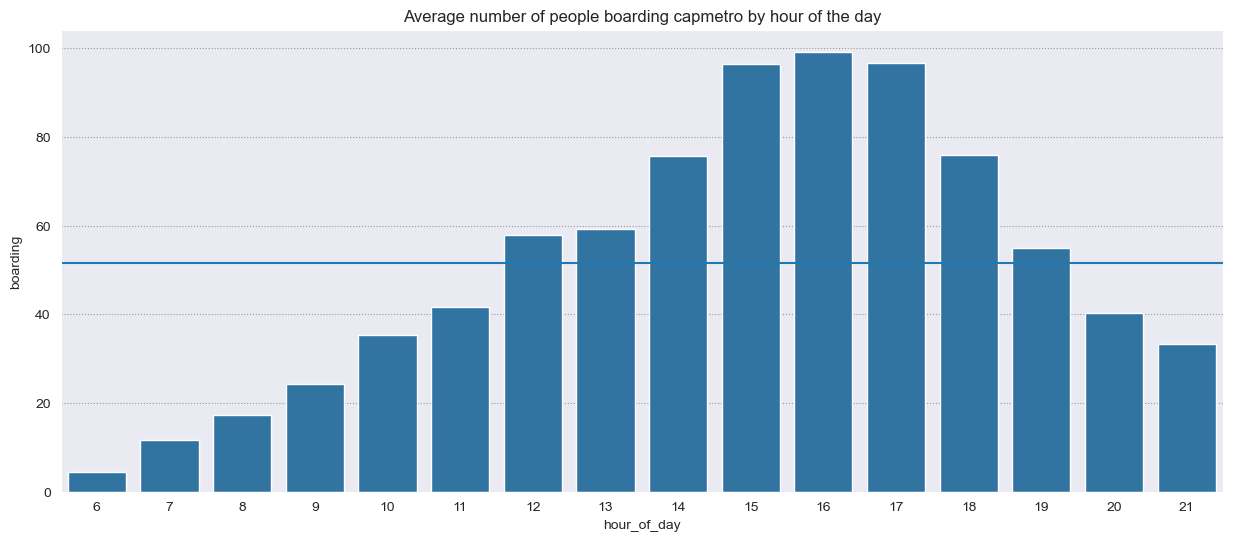

In [13]:
df_hour_boarding = df_capmetro.groupby('hour_of_day')['boarding'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=df_hour_boarding, x="hour_of_day",y = "boarding")
plt.axhline(y=df_hour_boarding['boarding'].mean())
plt.title("Average number of people boarding capmetro by hour of the day")
plt.show()

#### 2 PM - 6 PM are the times when people board Capmetro the most. The peak is at 4 PM. The temperature or working/class hours could be driving this behavior. The high temperatures during the day in Austin can be driving this behavior. We can look at the average temperature by each hour of the day to test this hypothesis

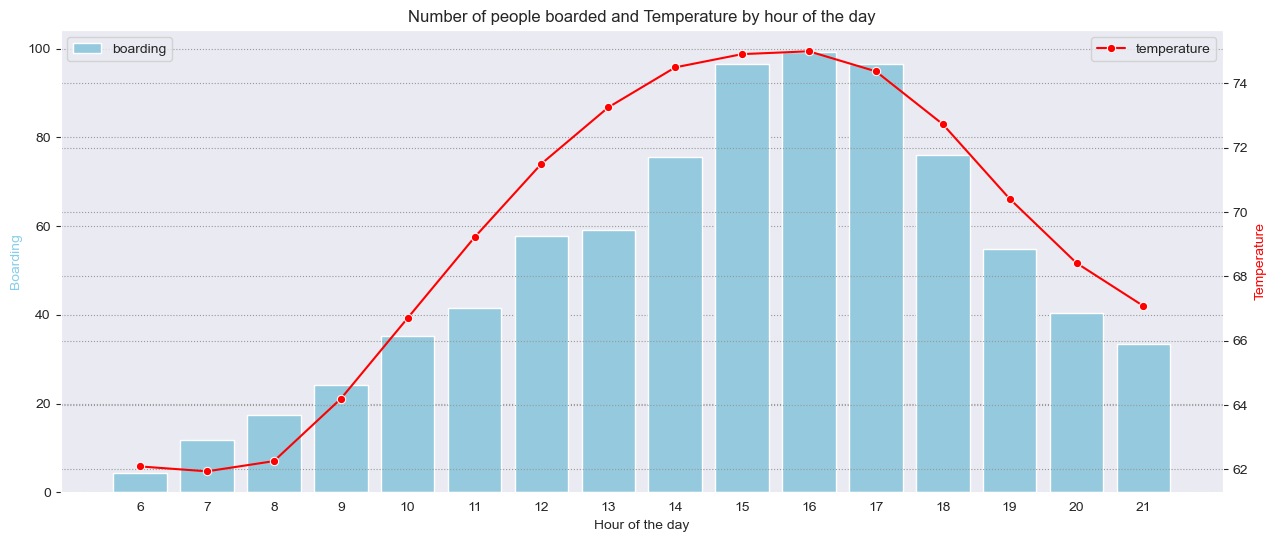

In [14]:
# The average temperature and number of people boarded per hour
df_hour_boarding_temp = df_capmetro.groupby('hour_of_day').agg({'temperature':'mean', 'boarding':'mean'}).reset_index()

# Ensuring hour_of_day is a categorical variable
df_hour_boarding_temp['hour_of_day'] = df_hour_boarding_temp['hour_of_day'].astype('str') 
fig, ax1 = plt.subplots(figsize=(15, 6)) #Plot fig size
sns.barplot(x='hour_of_day', y='boarding', data=df_hour_boarding_temp, ax=ax1, color='skyblue', label='boarding')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Create a line plot on ax2
sns.lineplot(x='hour_of_day', y='temperature', data=df_hour_boarding_temp, ax=ax2, color='red', marker='o', label='temperature')

# Adding labels and title
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Boarding', color='skyblue')
ax2.set_ylabel('Temperature', color='red')
plt.title('Number of people boarded and Temperature by hour of the day')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

#### Though it looks like temperatures are rising during the hours when boarding is high. The months are Sept-Nov so extreme heat/cold is not the reason. It is most likely the after-college/office hour rush.

### Is this trend consistent across months and does it change on weekends as compared to weekdays?

In [17]:
# Comparing weekends and weekdays
df_hour_boarding_temp = df_capmetro.groupby(['weekend', 'hour_of_day']).agg({'temperature':'mean', 'boarding':'mean'}).reset_index()

# Ensure hour_of_day is a categorical variable
df_hour_boarding_temp['hour_of_day'] = df_hour_boarding_temp['hour_of_day'].astype('str') 
weekends = df_hour_boarding_temp['weekend'].unique()

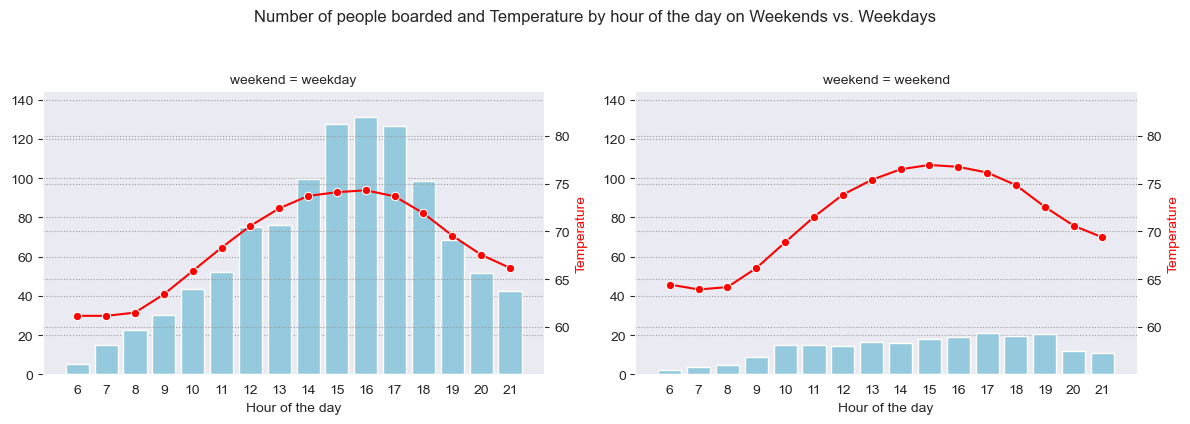

In [19]:
# Create a figure and a FacetGrid
g = sns.FacetGrid(df_hour_boarding_temp, col="weekend", col_wrap=2, height=4, aspect=1.5, sharey=False)

# Define the plot function
def plot_facet(data, **kwargs):
    ax = plt.gca()
    sns.barplot(x='hour_of_day', y='boarding', data=data, ax=ax, color='skyblue')
    ax2 = ax.twinx()
    sns.lineplot(x='hour_of_day', y='temperature', data=data, ax=ax2, color='red', marker='o')
    # Set consistent y-axis limits
    ax.set_ylim(0, df_hour_boarding_temp['boarding'].max() * 1.1)  # Adjust the limit for boarding
    ax2.set_ylim(df_hour_boarding_temp['temperature'].min() * 0.9, df_hour_boarding_temp['temperature'].max() * 1.1)  # Adjust the limit for temperature
    ax.set_ylabel('Boarding', color='skyblue')
    ax2.set_ylabel('Temperature', color='red')
    
# Apply the plot function to each facet
g.map_dataframe(plot_facet)

# Set the x and y axis labels
g.set_axis_labels("Hour of the day", "")
g.fig.suptitle('Number of people boarded and Temperature by hour of the day on Weekends vs. Weekdays', y=1.05)

# Show plot
plt.tight_layout()
plt.show()

#### The total number of people boarding on weekends is significantly lower than on weekdays. On Weekends, the pattern deviates slightly. The plot shows more people board Capmetro in the late evening hours, unlike weekdays. Peak boarding occurs between 5 PM to 7 PM whereas on weekdays it is between 2 PM to 6 PM. It could be due to people planning their fun activities during evenings on weekends. On weekdays, the trends align with working/class hours.

In [20]:
df_hour_boarding_temp = df_capmetro.groupby(['month', 'hour_of_day']).agg({'temperature':'mean', 'boarding':'mean'}).reset_index()

# hour_of_day converted as a categorical variable with all hours included

df_hour_boarding_temp['hour_of_day'] = df_hour_boarding_temp['hour_of_day'].astype('str') 
months = df_hour_boarding_temp['month'].unique()

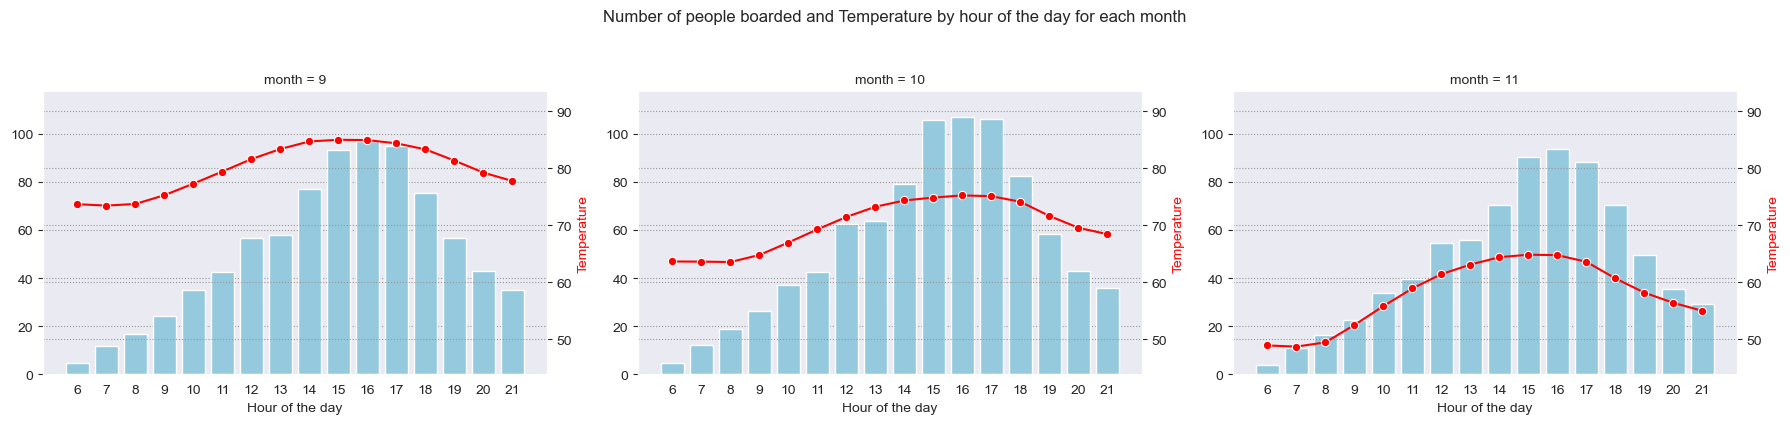

In [22]:
# Create a figure and a FacetGrid
g = sns.FacetGrid(df_hour_boarding_temp, col="month", col_wrap=3, height=4, aspect=1.5, sharey=False)

# Define the plot function
def plot_facet(data, **kwargs):
    ax = plt.gca()
    sns.barplot(x='hour_of_day', y='boarding', data=data, ax=ax, color='skyblue')
    ax2 = ax.twinx()
    sns.lineplot(x='hour_of_day', y='temperature', data=data, ax=ax2, color='red', marker='o')
    # Set consistent y-axis limits
    ax.set_ylim(0, df_hour_boarding_temp['boarding'].max() * 1.1)  # Adjust the limit for boarding
    ax2.set_ylim(df_hour_boarding_temp['temperature'].min() * 0.9, df_hour_boarding_temp['temperature'].max() * 1.1)  # Adjust the limit for temperature
    ax.set_ylabel('Boarding', color='skyblue')
    ax2.set_ylabel('Temperature', color='red')

# Apply the plot function to each facet
g.map_dataframe(plot_facet)

# Set the x and y axis labels
g.set_axis_labels("Hour of the day", "")
g.fig.suptitle('Number of people boarded and Temperature by hour of the day for each month', y=1.05)

# Show plot
plt.tight_layout()
plt.show()

#### The number of people boarding Capmetro was the highest in October and lowest in November. The low numbers in November could be driven by the holiday season.The temperatures are the lowest in November.


### Did the holiday season in November affect the number of people boarding capmetro?

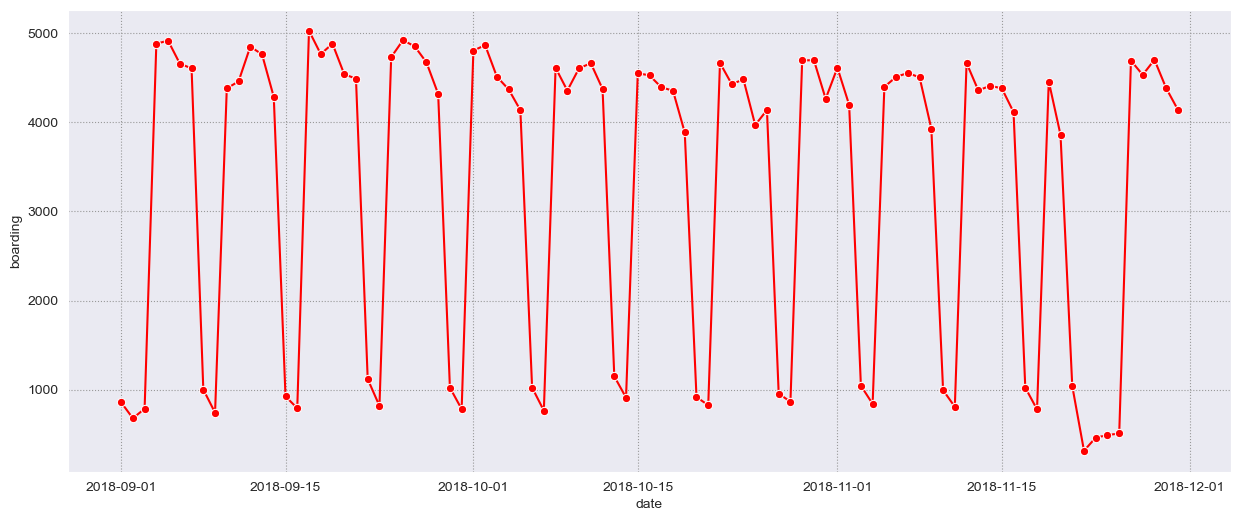

In [23]:
plt.figure(figsize=(15,6))
df_daily_boarding = df_capmetro.groupby('date')['boarding'].sum().reset_index()
sns.lineplot(x="date", y="boarding", data=df_daily_boarding,  color='red', marker='o')
plt.show()

#### We can observe from the above plot that towards the end of November the number of people boarding Capmetro dropped mainly because of the holiday season (Thanksgiving & Black Friday). The other drops observed throughout are on weekends.

### Let's study the patterns among people alighting Capmetro

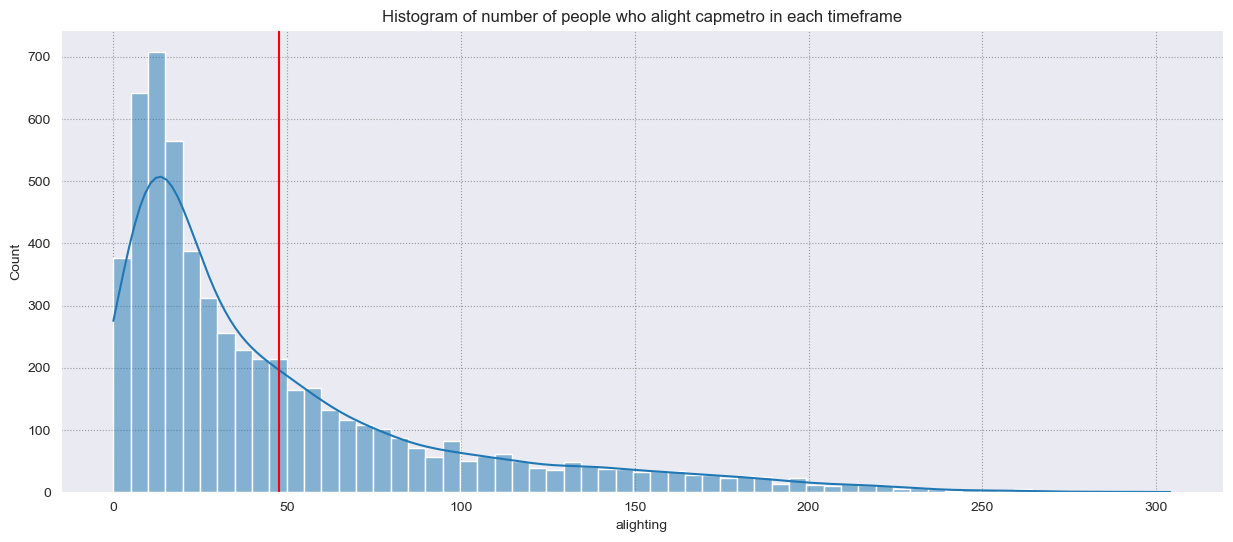

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_capmetro, x="alighting", binwidth=5, kde=True)
plt.axvline(x=df_capmetro['alighting'].mean(), color='r')
plt.title("Histogram of number of people who alight capmetro in each timeframe")
plt.show()

#### The distribution of the number of people who alight the Capmetro in each time frame (15-minute window) follows a similar distribution as the number of people boarding the Capmetro. This is also a right-skewed distribution. Average number of people who alight the capmetro bus in any time window is 47.6. These could be the peak hours in the morning when classes/work day starts. More insights can be uncovered if we look at the same distribution with time of the day.

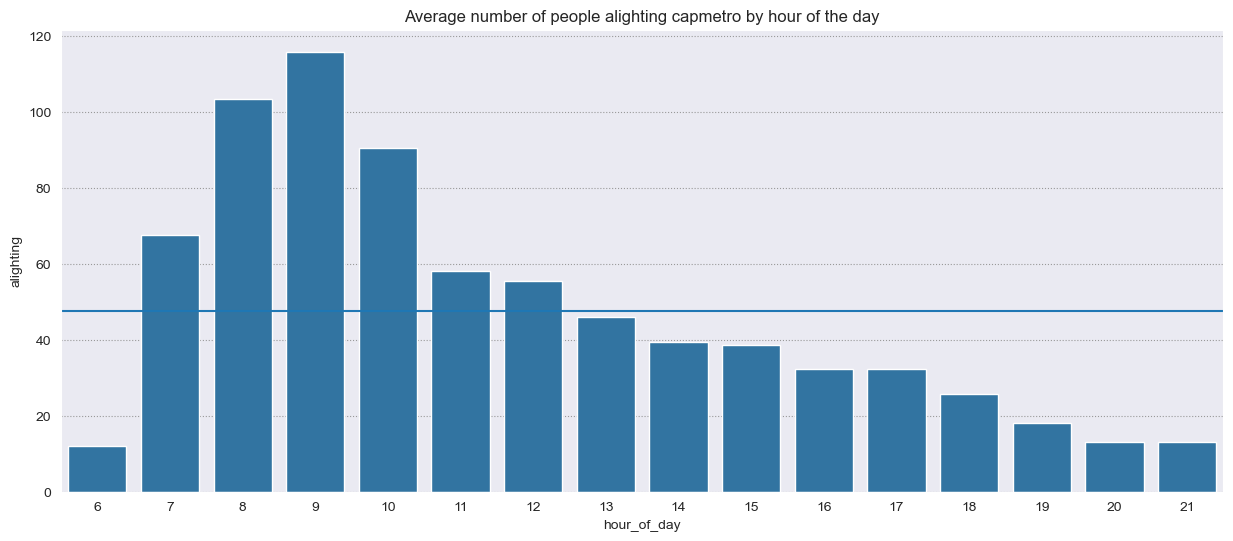

In [25]:
df_hour_alighting = df_capmetro.groupby('hour_of_day')['alighting'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=df_hour_alighting, x="hour_of_day",y = "alighting")
plt.axhline(y=df_hour_alighting['alighting'].mean())
plt.title("Average number of people alighting capmetro by hour of the day")
plt.show()

#### Average number of people alighting Capmetro is the highest between 8 AM to 10 AM. This spike could be due to people getting down for work or attending school

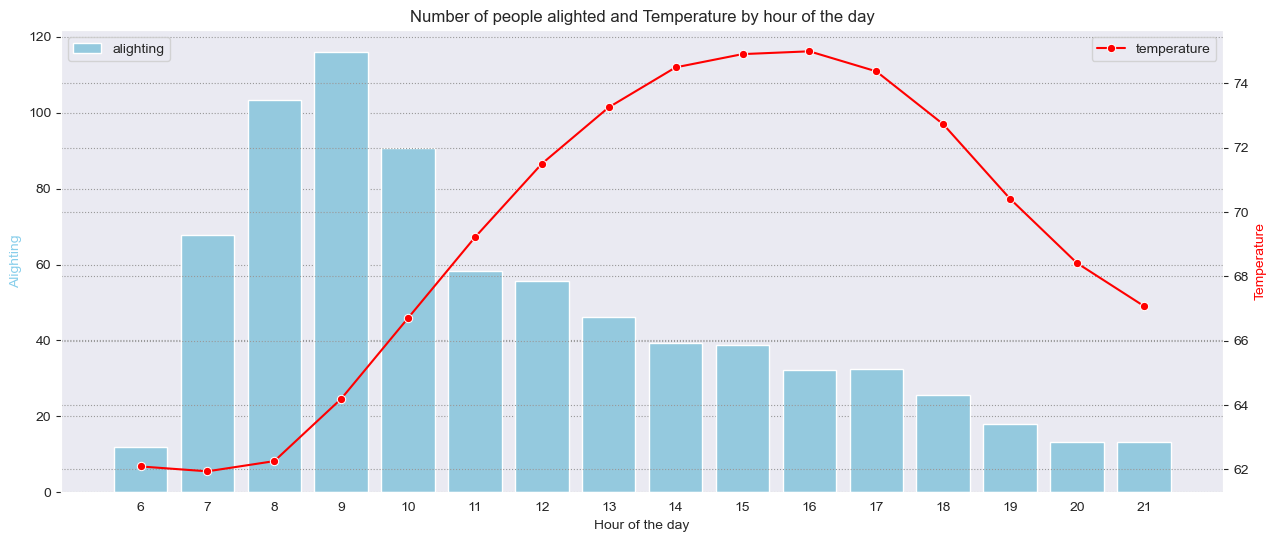

In [26]:
# Calculate average temperature and number of people boarded per hour
df_hour_alighting_temp = df_capmetro.groupby('hour_of_day').agg({'temperature':'mean', 'alighting':'mean'}).reset_index()

# Ensure hour_of_day is categorical variable
df_hour_alighting_temp['hour_of_day'] = df_hour_alighting_temp['hour_of_day'].astype('str') 
# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create a bar plot on ax1
sns.barplot(x='hour_of_day', y='alighting', data=df_hour_alighting_temp, ax=ax1, color='skyblue', label='alighting')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Create a line plot on ax2
sns.lineplot(x='hour_of_day', y='temperature', data=df_hour_alighting_temp, ax=ax2, color='red', marker='o', label='temperature')

# Adding labels and title
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Alighting', color='skyblue')
ax2.set_ylabel('Temperature', color='red')
plt.title('Number of people alighted and Temperature by hour of the day')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

#### The number of people alighting capmetro has an inverse relation with temperature. As we saw in boarding the temperature during Sept-Nov is more pleasant in Austin and thus it has no impact on the alighting. The alighting behavior is more influenced by the college/office hours.

### Is this trend consistent across months and does it change on weekends as compared to weekdays?

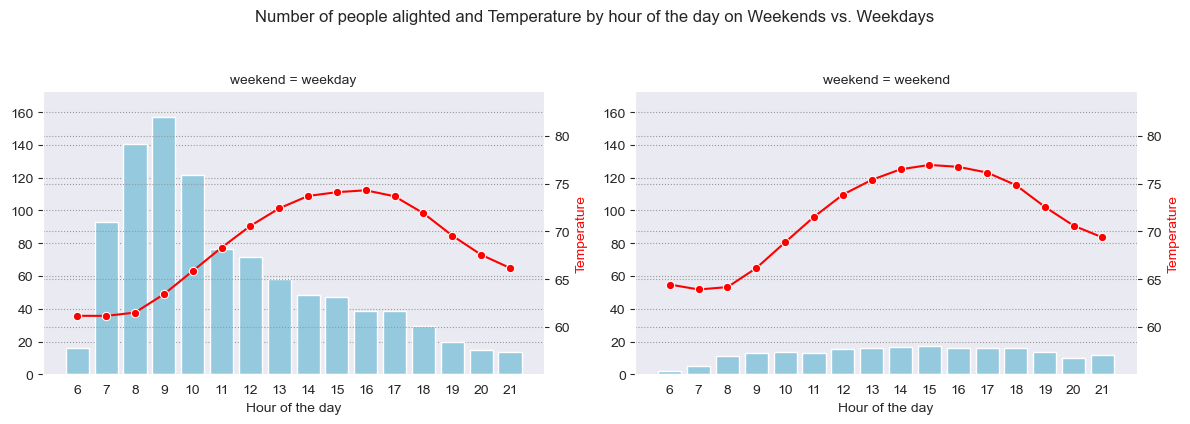

In [27]:

df_hour_alighting_temp = df_capmetro.groupby(['weekend', 'hour_of_day']).agg({'temperature':'mean', 'alighting':'mean'}).reset_index()

# hour_of_day is a categorical variable 

df_hour_alighting_temp['hour_of_day'] = df_hour_alighting_temp['hour_of_day'].astype('str') 
weekends = df_hour_alighting_temp['weekend'].unique()

# Create a figure and a FacetGrid
g = sns.FacetGrid(df_hour_alighting_temp, col="weekend", col_wrap=2, height=4, aspect=1.5, sharey=False)

# Define the plot function
def plot_facet(data, **kwargs):
    ax = plt.gca()
    sns.barplot(x='hour_of_day', y='alighting', data=data, ax=ax, color='skyblue')
    ax2 = ax.twinx()
    sns.lineplot(x='hour_of_day', y='temperature', data=data, ax=ax2, color='red', marker='o')
    # Set consistent y-axis limits
    ax.set_ylim(0, df_hour_alighting_temp['alighting'].max() * 1.1)  # Adjust the limit for boarding
    ax2.set_ylim(df_hour_alighting_temp['temperature'].min() * 0.9, df_hour_alighting_temp['temperature'].max() * 1.1)  # Adjust the limit for temperature
    ax.set_ylabel('Boarding', color='skyblue')
    ax2.set_ylabel('Temperature', color='red')

# Apply the plot function to each facet
g.map_dataframe(plot_facet)

# Set the x and y axis labels
g.set_axis_labels("Hour of the day", "")
g.fig.suptitle('Number of people alighted and Temperature by hour of the day on Weekends vs. Weekdays', y=1.05)

# Show plot
plt.tight_layout()
plt.show()

#### The total number of people boarding on weekends is significantly lower than on weekdays. The plot shows more people alight Capmetro in the late evening hours, unlike weekdays which is similar to boarding behavior on weekends.

### Let's study the alighting trends across months

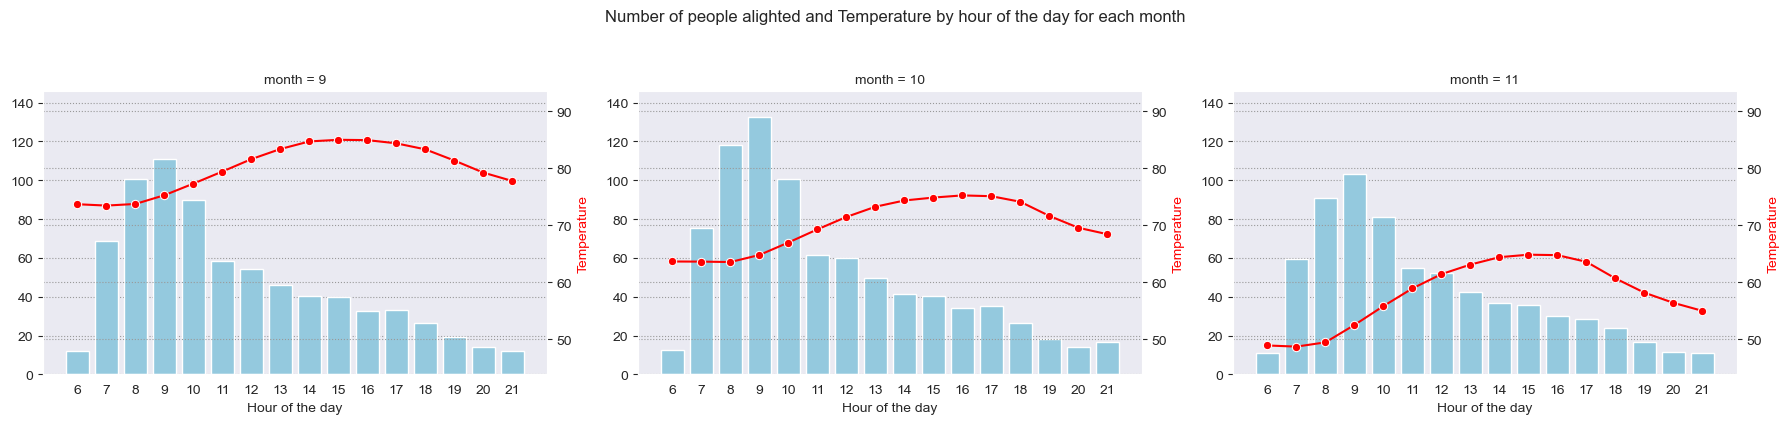

In [29]:
df_hour_alighting_temp = df_capmetro.groupby(['month', 'hour_of_day']).agg({'temperature':'mean', 'alighting':'mean'}).reset_index()
df_hour_alighting_temp['hour_of_day'] = df_hour_alighting_temp['hour_of_day'].astype('str') 
months = df_hour_alighting_temp['month'].unique()

# Create a figure and a FacetGrid
g = sns.FacetGrid(df_hour_alighting_temp, col="month", col_wrap=3, height=4, aspect=1.5, sharey=False)

# Define the plot function
def plot_facet(data, **kwargs):
    ax = plt.gca()
    sns.barplot(x='hour_of_day', y='alighting', data=data, ax=ax, color='skyblue')
    ax2 = ax.twinx()
    sns.lineplot(x='hour_of_day', y='temperature', data=data, ax=ax2, color='red', marker='o')
    # Set consistent y-axis limits
    ax.set_ylim(0, df_hour_alighting_temp['alighting'].max() * 1.1)  # Adjust the limit for boarding
    ax2.set_ylim(df_hour_alighting_temp['temperature'].min() * 0.9, df_hour_alighting_temp['temperature'].max() * 1.1)  # Adjust the limit for temperature
    ax.set_ylabel('Alighting', color='skyblue')
    ax2.set_ylabel('Temperature', color='red')

# Apply the plot function to each facet
g.map_dataframe(plot_facet)

# Set the x and y axis labels
g.set_axis_labels("Hour of the day", "")
g.fig.suptitle('Number of people alighted and Temperature by hour of the day for each month', y=1.05)

# Show plot
plt.tight_layout()
plt.show()

#### The number of people alighting Capmetro was the highest in October and lowest in November. The low numbers in November could be driven by holiday season. The average temperatures have reduced across months as expected. The relationship between temperature and the number of people alighted by hour remained the same across the months.

### Did the holiday season in November affect the number of people alighting Capmetro?

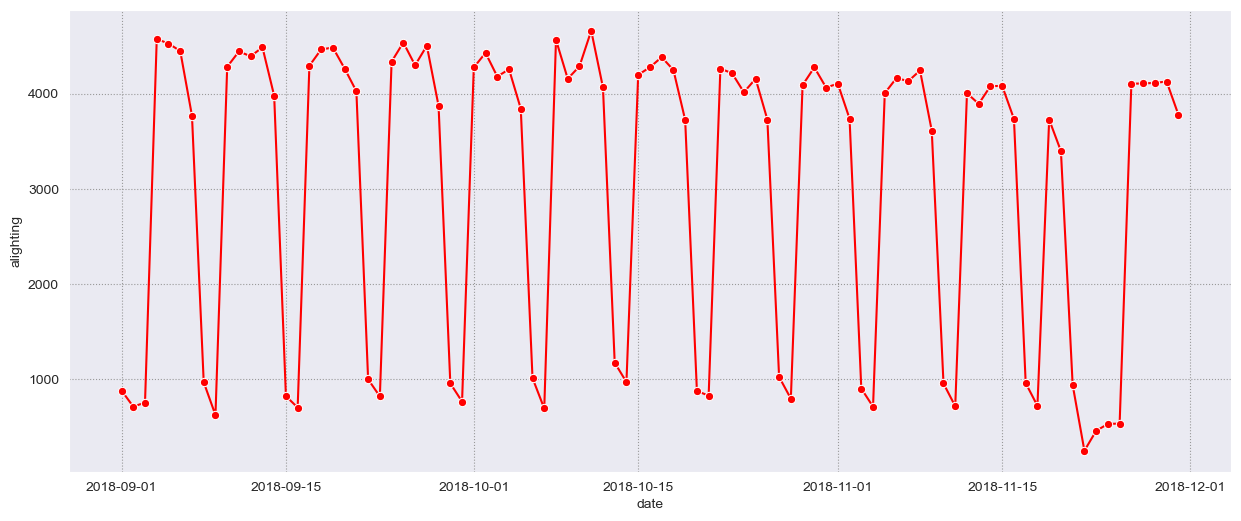

In [30]:
plt.figure(figsize=(15,6))
df_daily_alighting = df_capmetro.groupby('date')['alighting'].sum().reset_index()
sns.lineplot(x="date", y="alighting", data=df_daily_alighting,  color='red', marker='o')
plt.show()

#### We can observe from the above plot that towards the end of November the number of people alighting capmetro dropped mainly because of holiday season (Thanksgiving & Black Friday)

### Summary
****
- People travel to and from the UT Austin area and to different parts of Austin with Capmetro. They alight at UT Austin during morning hours and board Capmetro to reach their homes in the evening.
- The number of people boarding were the highest during 2 PM - 6 PM while the number of people alighting were the highest during morning hours between 8 AM - 10 AM
- During weekends, a significant drop was observed in the number of people boarding and alighting Capmetro.
The holiday season in November also caused a decrease in the number of people boarding and alighting Capmetro.

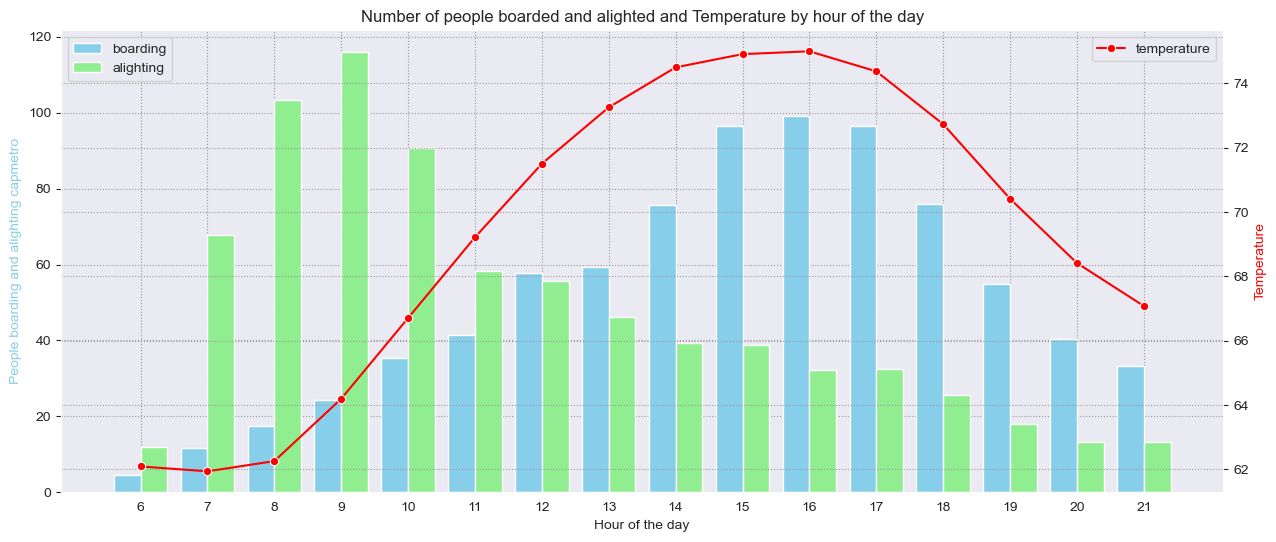

In [33]:

df_hour_both_temp = df_capmetro.groupby('hour_of_day').agg({'temperature':'mean', 'boarding':'mean', 'alighting':'mean'}).reset_index()

# Adjust positions for the bars
bar_width = 0.4
x = np.arange(len(df_hour_both_temp['hour_of_day']))

# hour_of_day as a categorical variable
df_hour_both_temp['hour_of_day'] = df_hour_both_temp['hour_of_day'].astype('str') 
# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create the first bar plot on ax1, slightly shifted to the left
ax1.bar(x - bar_width/2, df_hour_both_temp['boarding'], width=bar_width, color='skyblue', label='boarding')

# Create the second bar plot on ax1, slightly shifted to the right
ax1.bar(x + bar_width/2, df_hour_both_temp['alighting'], width=bar_width, color='lightgreen', label='alighting')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Create a line plot on ax2
sns.lineplot(x='hour_of_day', y='temperature', data=df_hour_both_temp, ax=ax2, color='red', marker='o', label='temperature')

# Adding labels and title
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('People boarding and alighting capmetro', color='skyblue')
ax2.set_ylabel('Temperature', color='red')
plt.title('Number of people boarded and alighted and Temperature by hour of the day')

# Adjust x-ticks to match the positions of the bars
ax1.set_xticks(x)
ax1.set_xticklabels(df_hour_both_temp['hour_of_day'])

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

#### Boarding and Alighting on weekday and weekend

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


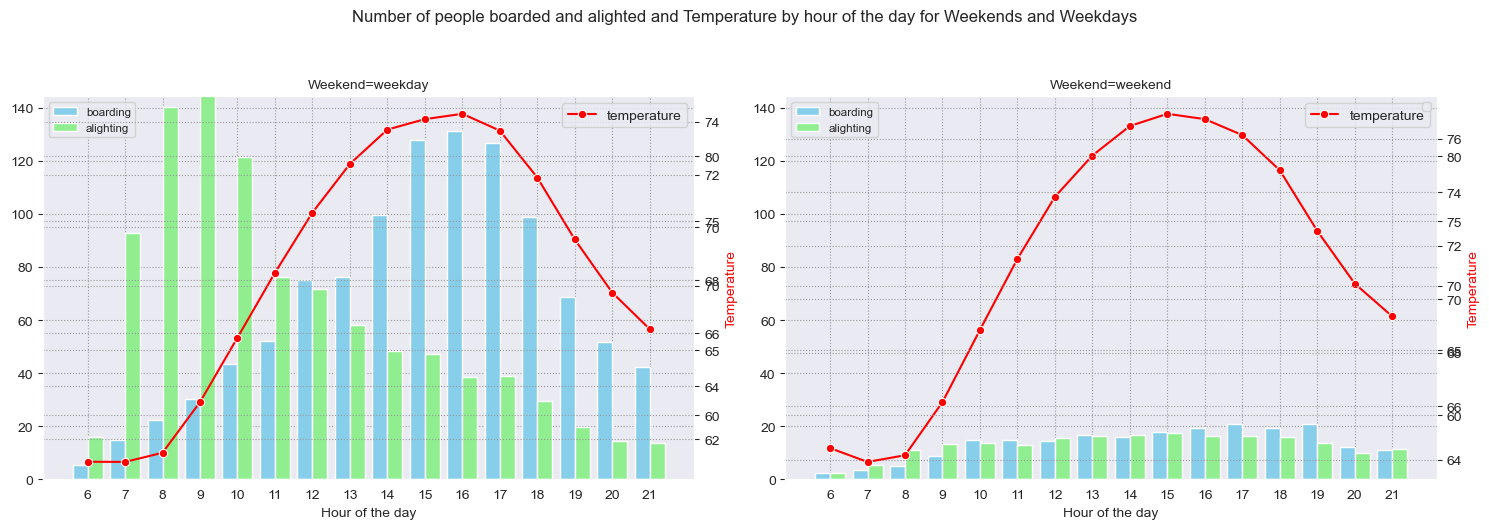

In [45]:
# Calculate average temperature and number of people boarded per hour
data = df_capmetro.groupby(['weekend','hour_of_day']).agg({'temperature':'mean', 'boarding':'mean', 'alighting':'mean'}).reset_index()

df = pd.DataFrame(data)

# Define the plot function
def plot_facet(data, **kwargs):
    ax = plt.gca()
    x = np.arange(len(data['hour_of_day']))
    bar_width = 0.4
    
    # Create the first bar plot on ax, slightly shifted to the left
    ax.bar(x - bar_width/2, data['boarding'], width=bar_width, color='skyblue', label='boarding')
    
    # Create the second bar plot on ax, slightly shifted to the right
    ax.bar(x + bar_width/2, data['alighting'], width=bar_width, color='lightgreen', label='alighting')
    
    # Create a second y-axis that shares the same x-axis
    ax2 = ax.twinx()
    
    # Create the line plot on ax2
    sns.lineplot(x=x, y=data['temperature'], ax=ax2, color='red', marker='o', label='temperature')
    
    # Adjust x-ticks to match the positions of the bars
    ax.set_xticks(x)
    ax.set_xticklabels(data['hour_of_day'])
    
    # Set labels
    ax.set_ylabel('People boarding and alighting counts')
    ax2.set_ylabel('Temperature', color='red')

# Create the FacetGrid
g = sns.FacetGrid(df, col="weekend", height=5, aspect=1.5, sharex=True, sharey=False)

# Map the plot function to the grid
g.map_dataframe(plot_facet)

# Set axis labels and titles
g.set_axis_labels("Hour of the day", "")
g.set_titles("Weekend={col_name}")
g.fig.suptitle('Number of people boarded and alighted and Temperature by hour of the day for Weekends and Weekdays', y=1.05)

# Determine the maximum y-limits across all data
max_boarding = df['boarding'].max() * 1.1
min_temperature = df['temperature'].min() * 0.9
max_temperature = df['temperature'].max() * 1.1

# Determine y-tick values
boarding_ticks = np.linspace(0, max_boarding, num=5)
temperature_ticks = np.linspace(min_temperature, max_temperature, num=5)

# Apply consistent y-limits and y-ticks to all facets
for ax in g.axes.flat:
    ax.set_ylim(0, max_boarding)  # Set consistent y-limit for boarding/alighting
    #ax.set_yticks(boarding_ticks)  # Set consistent y-ticks for boarding/alighting
    
    ax2 = ax.twinx()  # Access the twin y-axis
    ax2.set_ylim(min_temperature, max_temperature)  # Set consistent y-limit for temperature
    #ax2.set_yticks(temperature_ticks)  # Set consistent y-ticks for temperature

# Adjust the legend placement
for ax in g.axes.flat:
    ax.legend(loc='upper left', fontsize='small')
    ax2.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

#### Capmetro is more used around weekdays with boarding in the evening and alighting in the morning.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


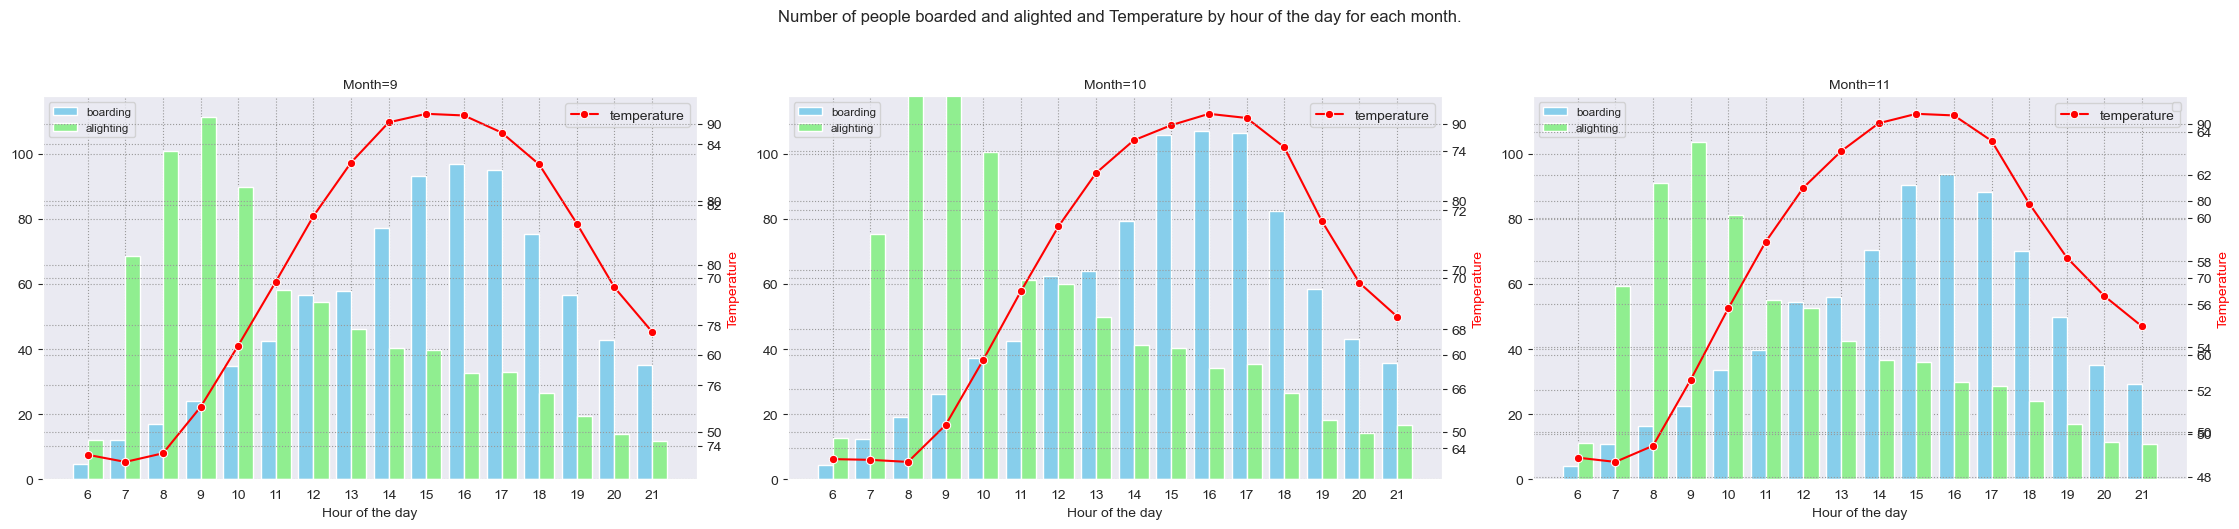

In [46]:
# average temperature and number of people boarded per hour
data = df_capmetro.groupby(['month','hour_of_day']).agg({'temperature':'mean', 'boarding':'mean', 'alighting':'mean'}).reset_index()

df = pd.DataFrame(data)

# Define the plot function
def plot_facet(data, **kwargs):
    ax = plt.gca()
    x = np.arange(len(data['hour_of_day']))
    bar_width = 0.4
    
    # Create the first bar plot on ax, slightly shifted to the left
    ax.bar(x - bar_width/2, data['boarding'], width=bar_width, color='skyblue', label='boarding')
    
    # Create the second bar plot on ax, slightly shifted to the right
    ax.bar(x + bar_width/2, data['alighting'], width=bar_width, color='lightgreen', label='alighting')
    
    # Create a second y-axis that shares the same x-axis
    ax2 = ax.twinx()
    
    # Create the line plot on ax2
    sns.lineplot(x=x, y=data['temperature'], ax=ax2, color='red', marker='o', label='temperature')
    
    # Adjust x-ticks to match the positions of the bars
    ax.set_xticks(x)
    ax.set_xticklabels(data['hour_of_day'])
    
    # Set labels
    ax.set_ylabel('People boarding and alighting counts')
    ax2.set_ylabel('Temperature', color='red')

# Create the FacetGrid
g = sns.FacetGrid(df, col="month", height=5, aspect=1.5, sharex=True, sharey=False)

# Map the plot function to the grid
g.map_dataframe(plot_facet)

# Set axis labels and titles
g.set_axis_labels("Hour of the day", "")
g.set_titles("Month={col_name}")
g.fig.suptitle('Number of people boarded and alighted and Temperature by hour of the day for each month.', y=1.05)

# Determine the maximum y-limits across all data
max_boarding = df['boarding'].max() * 1.1
min_temperature = df['temperature'].min() * 0.9
max_temperature = df['temperature'].max() * 1.1

# Determine y-tick values
boarding_ticks = np.linspace(0, max_boarding, num=5)
temperature_ticks = np.linspace(min_temperature, max_temperature, num=5)

# Apply consistent y-limits and y-ticks to all facets
for ax in g.axes.flat:
    ax.set_ylim(0, max_boarding)  # Set consistent y-limit for boarding/alighting
    #ax.set_yticks(boarding_ticks)  # Set consistent y-ticks for boarding/alighting
    
    ax2 = ax.twinx()  # Access the twin y-axis
    ax2.set_ylim(min_temperature, max_temperature)  # Set consistent y-limit for temperature
    #ax2.set_yticks(temperature_ticks)  # Set consistent y-ticks for temperature

# Adjust the legend placement
for ax in g.axes.flat:
    ax.legend(loc='upper left', fontsize='small')
    ax2.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

#### Sept and Oct months have more people using Capmetro than Nov